In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
import numpy as np

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

In [74]:
df = pd.read_csv("Data/RedDiode_Spectrum.txt", sep=";", decimal=',')

681.42


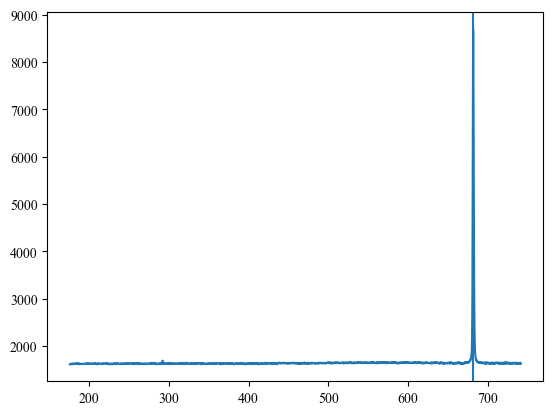

In [76]:
wavelength = np.array(pd.to_numeric(df["Wavelength"]))
data = np.array(pd.to_numeric(df["Raw data #1"]))

max_wavelength = wavelength[np.argmax(data)]

plt.plot(wavelength, data)
plt.axvline(max_wavelength)

print(max_wavelength)